In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv('../Data/final_dataset_v3.csv')

In [4]:
df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena mi casa,sector 68,0.92,7390.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,3,5.0,West,Under Construction,1245.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,50.0,622.500000
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,5.0,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0,623.750000
2,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4.0,4.0,2,2.0,East,Moderately Old,1750.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,115.0,437.500000
3,flat,la vida by tata housing,sector 113,2.78,10335.0,2690.0,Super Built up area 2690(249.91 sq.m.)Built Up...,3.0,4.0,3+,5.0,North-East,Relatively New,2690.0,2350.0,2170.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0,896.666667
4,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3.0,3.0,3,10.0,North-East,Relatively New,1852.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,59.0,617.333333


In [5]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1686
built_up_area          1970
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

### Built up area

<AxesSubplot:xlabel='built_up_area', ylabel='super_built_up_area'>

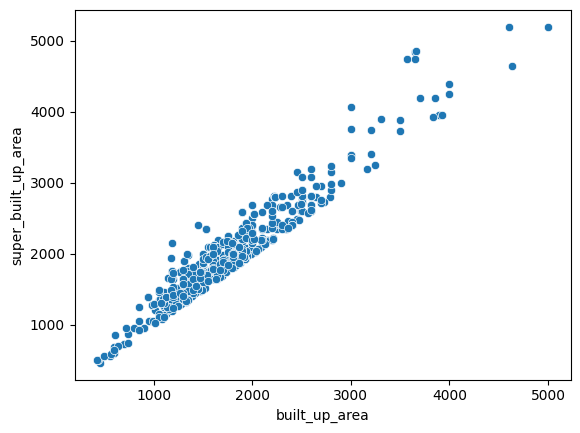

In [6]:
sns.scatterplot(data=df, x='built_up_area', y='super_built_up_area')

<AxesSubplot:xlabel='built_up_area', ylabel='carpet_area'>

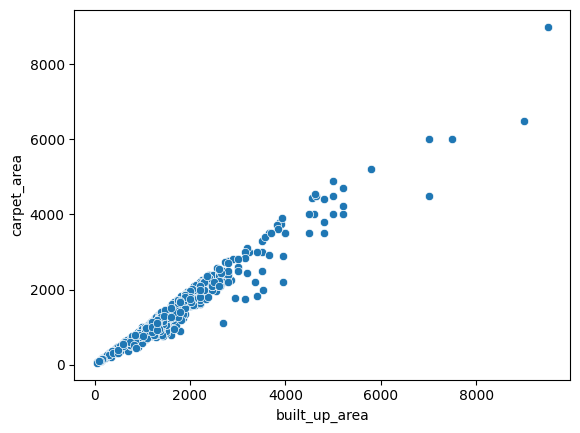

In [7]:
sns.scatterplot(data =df,x='built_up_area',y='carpet_area')

In [8]:
((df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull()))

0       False
1       False
2       False
3       False
4       False
        ...  
3551    False
3552    False
3553    False
3554    False
3555    False
Length: 3556, dtype: bool

In [9]:
all_present_df = df[~((df['super_built_up_area'].isnull()) | (df['built_up_area'].isnull()) | (df['carpet_area'].isnull()))]

In [10]:
all_present_df.shape

(531, 24)

In [11]:
super_to_built_up_ratio = (all_present_df['super_built_up_area']/all_present_df['built_up_area']).median()

In [12]:
carpet_to_built_up_ratio = (all_present_df['carpet_area']/all_present_df['built_up_area']).median()

In [13]:
print(super_to_built_up_ratio, carpet_to_built_up_ratio)

1.105263157894737 0.9


In [14]:
# both present built up null
sbc_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [15]:
sbc_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
1,flat,tata primanti,sector 72,4.00,16032.0,2495.0,Super Built up area 2905(269.88 sq.m.)Carpet a...,4.0,5.0,3+,22.0,West,Relatively New,2905.0,NaN,2495.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0,623.750000
12,flat,emaar mgf palm hills,sector 77,1.25,8621.0,1450.0,Super Built up area 1450(134.71 sq.m.)Carpet a...,3.0,4.0,3,3.0,North,Relatively New,1450.0,NaN,1177.0,0.0,0.0,0.0,0.0,0.0,0.0,49.0,483.333333
17,flat,ambience creacions,sector 22,2.79,15000.0,1860.0,Super Built up area 1860(172.8 sq.m.)Carpet ar...,3.0,3.0,3,13.0,East,New Property,1860.0,NaN,1300.0,0.0,0.0,0.0,0.0,0.0,1.0,158.0,620.000000
20,flat,shree vardhman victoria,sector 70,1.64,8384.0,1956.0,Super Built up area 1950(181.16 sq.m.)Carpet a...,3.0,5.0,3,3.0,North,Relatively New,1950.0,NaN,1161.0,0.0,0.0,0.0,0.0,0.0,0.0,51.0,652.000000
26,flat,m3m sierra 68,sector 68,1.25,10246.0,1220.0,Super Built up area 1220(113.34 sq.m.)Carpet a...,2.0,2.0,3,4.0,NaN,New Property,1220.0,NaN,694.0,0.0,0.0,0.0,0.0,0.0,0.0,44.0,610.000000


In [16]:
sbc_df['built_up_area'].fillna(round(((sbc_df['super_built_up_area']/1.105) + (sbc_df['carpet_area']/0.9))/2),inplace=True)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [17]:
df.update(sbc_df)

In [18]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1686
built_up_area          1550
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [19]:
# sb present c is null built up null
sb_df = df[~(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & (df['carpet_area'].isnull())]

In [20]:
sb_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
0,flat,pareena mi casa,sector 68,0.92,7390.0,1245.0,Super Built up area 1245(115.66 sq.m.),2.0,2.0,3,5.0,West,Under Construction,1245.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,50.0,622.500000
2,flat,sare crescent parc,sector 92,0.87,4971.0,1750.0,Super Built up area 1750(162.58 sq.m.),4.0,4.0,2,2.0,East,Moderately Old,1750.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,1.0,115.0,437.500000
4,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,1852.0,Super Built up area 1852(172.06 sq.m.),3.0,3.0,3,10.0,North-East,Relatively New,1852.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,59.0,617.333333
9,flat,shapoorji pallonji joyville gurugram,sector 102,1.41,10307.0,1368.0,Super Built up area 1368(127.09 sq.m.),2.0,2.0,3,0.0,North-East,Relatively New,1368.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,49.0,684.000000
38,flat,mittal surya vihar,sector 21,1.40,5833.0,2400.0,Super Built up area 2400(222.97 sq.m.),5.0,4.0,2,2.0,NaN,Moderately Old,2400.0,NaN,NaN,0.0,0.0,0.0,0.0,0.0,0.0,0.0,480.000000


In [21]:
sb_df['built_up_area'].fillna(round(sb_df['super_built_up_area']/1.105),inplace=True)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [22]:
df.update(sb_df)

In [23]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1686
built_up_area           679
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

In [24]:
# sb null c is present built up null
c_df = df[(df['super_built_up_area'].isnull()) & (df['built_up_area'].isnull()) & ~(df['carpet_area'].isnull())]

In [25]:
c_df.head()

,property_type,society,sector,price,price_per_sqft,area,areaWithType,bedRoom,bathroom,balcony,floorNum,facing,agePossession,super_built_up_area,built_up_area,carpet_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score,area_room_ratio
13,flat,mapsko paradise,sector 83,0.95,6300.0,1508.0,Carpet area: 1340 (124.49 sq.m.),3.0,3.0,3,1.0,NaN,Moderately Old,NaN,NaN,1340.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,502.666667
15,flat,godrej nature plus,sector 33,1.67,10503.0,1590.0,Carpet area: 1671 (155.24 sq.m.),3.0,2.0,2,18.0,NaN,Under Construction,NaN,NaN,1671.0,0.0,0.0,0.0,0.0,0.0,0.0,67.0,530.000000
18,flat,ansal sushant lok ci,sector 43,2.00,15152.0,1320.0,Carpet area: 1320 (122.63 sq.m.),3.0,3.0,2,1.0,North,Old Property,NaN,NaN,1320.0,0.0,0.0,0.0,0.0,0.0,1.0,15.0,440.000000
21,flat,adani aangan arcade,sector 88a,0.45,7200.0,625.0,Carpet area: 625 (58.06 sq.m.),2.0,2.0,1,3.0,NaN,New Property,NaN,NaN,625.0,0.0,0.0,0.0,0.0,0.0,0.0,14.0,312.500000
25,flat,ats triumph,sector 104,2.30,10000.0,2300.0,Carpet area: 2290 (212.75 sq.m.),3.0,4.0,3+,15.0,North-East,New Property,NaN,NaN,2290.0,0.0,0.0,0.0,0.0,0.0,0.0,117.0,766.666667


In [26]:
c_df['built_up_area'].fillna(round(c_df['carpet_area']/0.9),inplace=True)

/home/roronoa/.conda/envs/tf/lib/python3.7/site-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [27]:
df.update(c_df)

In [28]:
df.isnull().sum()

property_type             0
society                   0
sector                    0
price                     0
price_per_sqft            0
area                      0
areaWithType              0
bedRoom                   0
bathroom                  0
balcony                   0
floorNum                 17
facing                 1008
agePossession             0
super_built_up_area    1686
built_up_area             0
carpet_area            1710
study room                0
servant room              0
store room                0
pooja room                0
others                    0
furnishing_type           0
luxury_score              0
area_room_ratio           0
dtype: int64

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

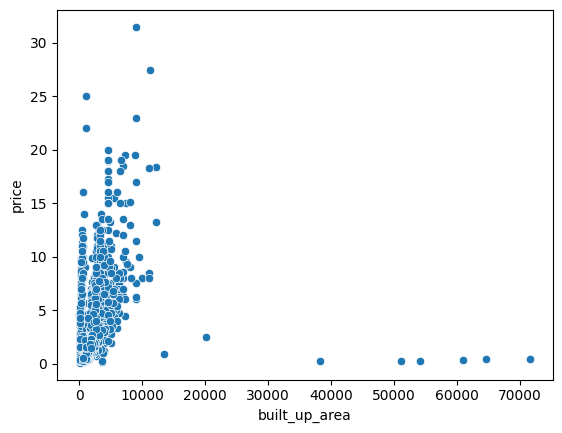

In [29]:
sns.scatterplot(data = df,x='built_up_area',y='price')

In [30]:
anamoly_df = df[(df['built_up_area'] < 2000) & (df['price'] > 2.5)][['price','area','built_up_area']]

In [31]:
anamoly_df.sample(5)

,price,area,built_up_area
2685,3.35,1242.0,1242.0
2835,4.00,1503.0,1503.0
2909,9.50,2250.0,300.0
2112,25.00,8036.0,1000.0
2356,3.00,1557.0,1557.0


In [32]:
anamoly_df['built_up_area'] = anamoly_df['area']

In [33]:
df.update(anamoly_df)

<AxesSubplot:xlabel='built_up_area', ylabel='price'>

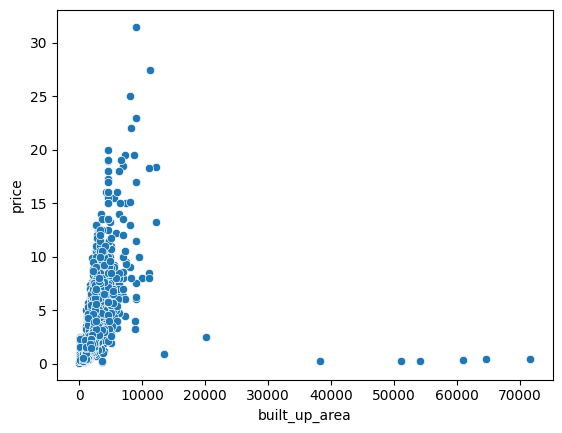

In [34]:
sns.scatterplot(data =df,x='built_up_area',y='price')

In [35]:
df.drop(columns=['area','areaWithType','super_built_up_area','carpet_area','area_room_ratio'],inplace=True)

In [36]:
df.head()

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
0,flat,pareena mi casa,sector 68,0.92,7390.0,2.0,2.0,3,5.0,West,Under Construction,1127.0,0.0,0.0,0.0,0.0,0.0,0.0,50.0
1,flat,tata primanti,sector 72,4.00,16032.0,4.0,5.0,3+,22.0,West,Relatively New,2701.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0
2,flat,sare crescent parc,sector 92,0.87,4971.0,4.0,4.0,2,2.0,East,Moderately Old,1584.0,0.0,0.0,0.0,0.0,0.0,1.0,115.0
3,flat,la vida by tata housing,sector 113,2.78,10335.0,3.0,4.0,3+,5.0,North-East,Relatively New,2350.0,0.0,0.0,0.0,0.0,0.0,0.0,174.0
4,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,10529.0,3.0,3.0,3,10.0,North-East,Relatively New,1676.0,0.0,0.0,0.0,0.0,0.0,0.0,59.0


In [37]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum             17
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

### floorNum

In [38]:
df[df['floorNum'].isnull()]

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,facing,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
163,house,vipul tatvam villa,sector 48,8.50,26235.0,4.0,4.0,1,NaN,NaN,Relatively New,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,21.0
335,house,jacob pura,sector 12,0.35,9722.0,2.0,1.0,0,NaN,NaN,Old Property,360.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
388,house,emaar mgf marbella,sector 66,9.00,21251.0,4.0,4.0,3+,NaN,South-West,Relatively New,5200.0,0.0,0.0,0.0,0.0,0.0,2.0,114.0
830,house,independent,sector 24,1.45,2984.0,3.0,3.0,1,NaN,NaN,Old Property,540.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0
843,flat,independent,sector 78,0.60,3692.0,2.0,2.0,0,NaN,NaN,Under Construction,1625.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
905,house,independent,sector 25,13.00,45710.0,6.0,8.0,3+,NaN,NaN,Relatively New,2844.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1427,house,independent,sector 3,1.50,10288.0,3.0,3.0,0,NaN,NaN,Old Property,210.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1515,house,ansal sushant lok plots,sector 43,3.30,26570.0,1.0,1.0,0,NaN,NaN,Under Construction,1242.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2241,house,independent,sector 2,5.60,17284.0,8.0,6.0,3+,NaN,South-West,Moderately Old,3240.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2263,house,independent,sector 4,4.12,8889.0,2.0,1.0,3+,NaN,NaN,Moderately Old,4635.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [39]:
df[df['property_type'] == 'house']['floorNum'].median()

2.0

In [40]:
df['floorNum'].fillna(2.0,inplace=True)

In [41]:
df.isnull().sum()

property_type         0
society               0
sector                0
price                 0
price_per_sqft        0
bedRoom               0
bathroom              0
balcony               0
floorNum              0
facing             1008
agePossession         0
built_up_area         0
study room            0
servant room          0
store room            0
pooja room            0
others                0
furnishing_type       0
luxury_score          0
dtype: int64

In [42]:
1011/df.shape[0]

0.28430821147356583

### facing

<AxesSubplot:ylabel='facing'>

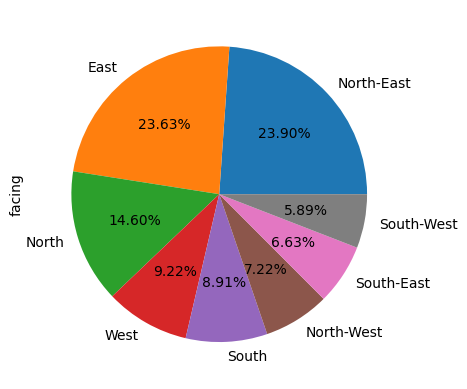

In [43]:
df['facing'].value_counts().plot(kind='pie',autopct='%0.2f%%')

In [44]:
df.drop(columns=['facing'],inplace=True)

In [45]:
df.sample(5)

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
1329,flat,dlf regal gardens,sector 90,1.30,7151.0,3.0,3.0,3+,7.0,Relatively New,1700.0,0.0,0.0,0.0,0.0,0.0,0.0,141.0
27,house,eldeco mansionz,sector 48,5.15,18885.0,5.0,7.0,3,2.0,Moderately Old,2727.0,0.0,0.0,0.0,0.0,0.0,2.0,145.0
611,flat,shapoorji pallonji joyville gurugram,sector 102,1.95,13929.0,3.0,3.0,3,6.0,New Property,1616.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0
1992,house,independent,sector 25,10.00,37037.0,5.0,6.0,3,3.0,Old Property,2700.0,0.0,0.0,0.0,0.0,0.0,2.0,64.0
518,flat,m3m golfestate,sector 65,6.10,18139.0,3.0,3.0,3,19.0,Moderately Old,3027.0,0.0,0.0,0.0,0.0,0.0,2.0,174.0


In [46]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [47]:
df.drop(index=[2536],inplace=True)

In [48]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

### agePossession

In [49]:
df['agePossession'].value_counts()

Relatively New        1609
New Property           556
Moderately Old         545
Old Property           292
Undefined              290
Under Construction     263
Name: agePossession, dtype: int64

In [50]:
df[df['agePossession'] == 'Undefined']

,property_type,society,sector,price,price_per_sqft,bedRoom,bathroom,balcony,floorNum,agePossession,built_up_area,study room,servant room,store room,pooja room,others,furnishing_type,luxury_score
19,house,bhim nagar society,sector 6,0.40,2500.0,4.0,2.0,2,1.0,Undefined,1600.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
24,flat,dlf the arbour,sector 63,7.52,18999.0,4.0,4.0,3,15.0,Undefined,3956.0,0.0,0.0,0.0,0.0,0.0,0.0,61.0
31,flat,aipl peaceful homes,sector 70a,2.75,12791.0,3.0,3.0,3+,14.0,Undefined,2150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
34,flat,breeze global heights,sector 33,0.40,6421.0,2.0,2.0,2,4.0,Undefined,623.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
35,flat,eldeco accolade,sector 33,1.20,8043.0,2.0,2.0,2,0.0,Undefined,1492.0,0.0,0.0,0.0,0.0,0.0,0.0,56.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3522,flat,lord krishna,sector 12,2.70,8571.0,4.0,3.0,3,6.0,Undefined,3150.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3532,house,independent,sector 7,0.45,5000.0,3.0,2.0,0,1.0,Undefined,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3545,flat,ansal plaza,sector 2,1.00,10000.0,2.0,3.0,0,1.0,Undefined,1000.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3547,flat,conscient elevate,sector 59,3.90,16993.0,3.0,1.0,0,0.0,Undefined,2295.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [51]:
def mode_based_imputation(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector']) & (df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [52]:
df['agePossession'] = df.apply(mode_based_imputation,axis=1)

In [53]:
df['agePossession'].value_counts()

Relatively New        1736
New Property           585
Moderately Old         584
Old Property           325
Under Construction     277
Undefined               48
Name: agePossession, dtype: int64

In [54]:
def mode_based_imputation2(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['sector'] == row['sector'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [55]:
df['agePossession'] = df.apply(mode_based_imputation2,axis=1)

In [56]:
df['agePossession'].value_counts()

Relatively New        1747
Moderately Old         591
New Property           586
Old Property           328
Under Construction     277
Undefined               26
Name: agePossession, dtype: int64

In [57]:
def mode_based_imputation3(row):
    if row['agePossession'] == 'Undefined':
        mode_value = df[(df['property_type'] == row['property_type'])]['agePossession'].mode()
        # If mode_value is empty (no mode found), return NaN, otherwise return the mode
        if not mode_value.empty:
            return mode_value.iloc[0] 
        else:
            return np.nan
    else:
        return row['agePossession']

In [58]:
df['agePossession'] = df.apply(mode_based_imputation3,axis=1)

In [59]:
df['agePossession'].value_counts()

Relatively New        1747
Moderately Old         617
New Property           586
Old Property           328
Under Construction     277
Name: agePossession, dtype: int64

In [60]:
df.isnull().sum()

property_type      0
society            0
sector             0
price              0
price_per_sqft     0
bedRoom            0
bathroom           0
balcony            0
floorNum           0
agePossession      0
built_up_area      0
study room         0
servant room       0
store room         0
pooja room         0
others             0
furnishing_type    0
luxury_score       0
dtype: int64

In [61]:
df.to_csv('../Data/final_dataset_v4.csv',index=False)

In [62]:
df.shape

(3555, 18)